In [1]:
import midi_functions
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import callbacks
from keras import optimizers

from IPython.display import clear_output
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
input_length = 50
X_orig = np.loadtxt('notes/50clementiHX.txt')
Y_orig = np.loadtxt('notes/50clementiHY.txt')
#sorted_notes = np.loadtxt('notes/norm_sorted_notesH.txt')
sorted_notes = np.unique(Y_orig)
n = X_orig.shape[0]
Y = np.copy(Y_orig)
max_note = np.max(Y)
min_note = np.min(Y)

X = X_orig / max_note #normalize input
n_notes_Y = n_hidden_units = len(sorted_notes)

for i,note in enumerate(Y): #make all the notes a number between 0 and number_of_different_notes
    Y[i] = np.where(sorted_notes == note)[0]
Y = np_utils.to_categorical(Y)

print('X={}, Y={}'.format(len(np.unique(X)),n_notes_Y))
print('Shape of X: {}'.format(X.shape))
print('Max: {}, Min: {}'.format(max_note, min_note))

X=38, Y=38
Shape of X: (9630, 10)
Max: 89.0, Min: 50.0


In [4]:
model = Sequential()
    
model.add(Dense(n_hidden_units, input_shape=((input_length,))))
          
model.add(Activation('softmax'))
    
rmsprop = optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
# Load the weights to each node
model.load_weights('./weights/softmax/399.hdf5')
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 38)                418       
_________________________________________________________________
activation_1 (Activation)    (None, 38)                0         
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Whatever it doesn't work
loss = log[:,0]
val_loss = log[:,1]
epochs = np.arange(len(loss)) + 1

plt.plot(epochs, log[:,0], label='loss')
plt.plot(epochs, log[:,1], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('cross entropy')

 plt.plot(self.epochs, self.losses, label="loss")
        plt.plot(self.epochs, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
        plt.plot(self.epochs, self.acc, label="acc")
        plt.plot(self.epochs, self.val_acc, label="val_acc")
        plt.legend()
        plt.show();

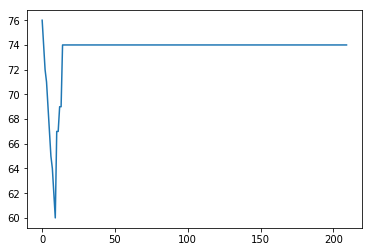

In [5]:
#Generate 200 notes
#model.load_weights('./hijacked_weights/hijacked-125.hdf5')
#random sequence to initialize predictions
init = X[np.random.randint(0,len(X))]

predicted_notes = np.zeros(200 + input_length)
predicted_notes[0:input_length] = init

for note_index in range(200):
    x = predicted_notes[note_index:note_index + input_length]
    prediction = model.predict(x.reshape(1,input_length))
    predicted_notes[note_index + input_length] = sorted_notes[np.argmax(prediction)] / max_note
predicted_notes = predicted_notes * max_note
plt.plot(predicted_notes)

In [102]:
#write to file
midi_functions.create_midi_from_notes(predicted_notes, 'generated_clementi_music-236.mid',on=250)

In [5]:
#Create a little evaluation set for normal prediction (integer classes)
validation_split=0.20
n_val = int(validation_split * n)

Y_true = np.array(list(np.argwhere(sorted_notes == y) for y in np.copy(Y_orig[-n_val:]))).reshape(n_val)
X_val = np.copy(X_orig[-n_val:]) / max_note

Y_pred = model.predict(X_val.reshape(n_val,input_length))

Y_pred = np.array(list(np.argmax(y) for y in Y_pred))

In [13]:
np.unique(Y_pred)

array([16, 18, 23, 25, 28])

In [14]:
sorted_notes[np.unique(Y_pred)]

array([67., 69., 74., 76., 79.])

In [8]:
np.sum(Y_pred == 23)

1596

In [9]:
sorted_notes[23]

74.0

Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Normalized confusion matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


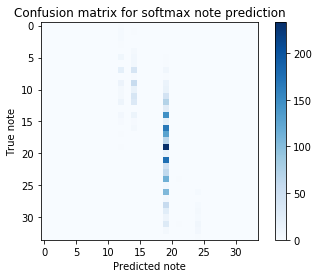

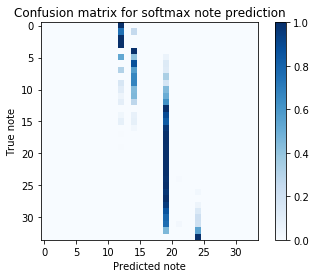

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")

    print(cm)

    fig, ax = plt.subplots()

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
           title=title,
           ylabel='True note',
           xlabel='Predicted note')

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred,
                      title='Confusion matrix for softmax note prediction')
plt.savefig('CM_SOFTMAX_unnormalized.pdf')

# Plot normalized confusion matrix
plot_confusion_matrix(Y_true, Y_pred, normalize=True,
                      title='Confusion matrix for softmax note prediction')
plt.savefig('CM_SOFTMAX_normalized.pdf')
plt.show()

In [93]:
#Create a little evaluation set for normal prediction
X_orig = np.loadtxt('notes/10X.txt')
Y_orig = np.loadtxt('notes/10Y.txt')
sorted_notes_eval = np.loadtxt('notes/norm_sorted_notes.txt')

max_note = np.max(sorted_notes)

X_eval = X_orig[-1000:]
Y_eval = Y_orig[-1000:]

X_eval = X_eval / max_note #normalize input

new_X_eval = []
new_Y_eval = []
for i,note in enumerate(Y_eval): #make all the notes a number between 0 and number_of_different_notes
    if note in sorted_notes_eval:
        #print(np.where(sorted_notes_eval == note)[0][0])
        new_Y_eval.append(np.where(sorted_notes_eval == note)[0][0])
        new_X_eval.append(np.copy(X_eval[i]))
        
X_eval = np.array(new_X_eval)
Y_eval = np.array(new_Y_eval)
Y_eval = np_utils.to_categorical(Y_eval)

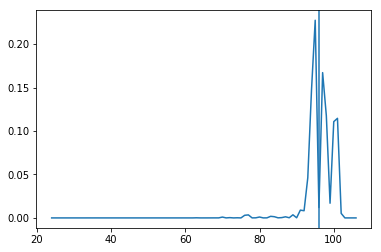

In [97]:
#see what the ouput of softmax looks like compared to last note in input
x = X[np.random.randint(0,len(X))]
prediction = model.predict(x.reshape(1,input_length,1))
plt.plot(sorted_notes, prediction.reshape(n_notes_Y))
plt.axvline(x=x[input_length] * max_note)

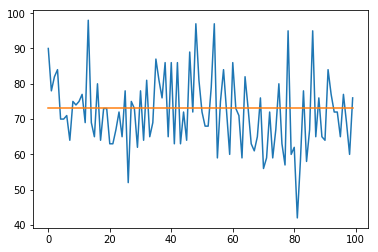

In [47]:
def generate_music_with_bias(bias):
    length = len(bias)
    init = X[np.random.randint(0,len(X))] #Picks out a random training example to begin generation

    predicted_notes = np.zeros(length + input_length)
    predicted_notes[0:input_length] = init
    #predicted_notes[9] = mean / max_note
    
    for note_index, note in enumerate(bias):
        x[0:input_length - 1] = predicted_notes[note_index:note_index + input_length - 1]
        x[input_length - 1] = note / max_note
        prediction = model.predict(x.reshape(1,input_length,1))
        predicted_notes[note_index + input_length] = sorted_notes[np.argmax(prediction)] / max_note
    
    return predicted_notes[input_length:] * max_note
    
bias = np.ones(100) * 73
predicted_notes = generate_music_with_bias(bias)
plt.plot(predicted_notes)
plt.plot(bias)

In [21]:
def generate_music_with_bias(bias):
    length = len(bias)
    init = X[np.random.randint(0,len(X))] #Picks out a random training example to begin generation

    predicted_notes = np.zeros(length + input_length)
    predicted_notes[0:input_length] = init
    #predicted_notes[9] = mean / max_note
    x = np.zeros(input_length)
    for note_index, note in enumerate(bias):
        x[0:input_length - 1] = predicted_notes[note_index:note_index + input_length - 1]
        x[input_length - 1] = note / max_note
        prediction = model.predict(x.reshape(1,input_length))
        predicted_notes[note_index + input_length] = sorted_notes[np.argmax(prediction)] / max_note
    
    return predicted_notes[input_length:] * max_note

In [11]:
#Generate music based on trajectory
top = 100
bot = 45
traj = np.loadtxt('traj/0001')
traj = traj[:,1]
max_traj = np.max(traj)
min_traj = np.min(traj)
traj = traj - min_traj
traj = traj / (max_traj - min_traj) * (top - bot)
traj += bot

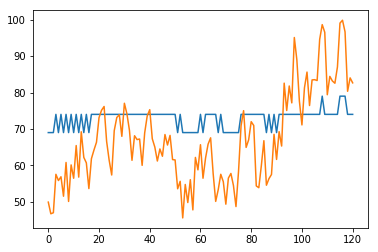

In [8]:
#Place notes at certain intervals
traj_points_per_note = 5

points = np.arange(0,len(traj),traj_points_per_note)
new_traj = traj[points]

predicted_notes = generate_music_with_bias(new_traj)
plt.plot(predicted_notes)
plt.plot(new_traj)

In [105]:
#write to file
midi_functions.create_midi_from_notes(predicted_notes,'clementi-236-traj0001.mid', on=250)

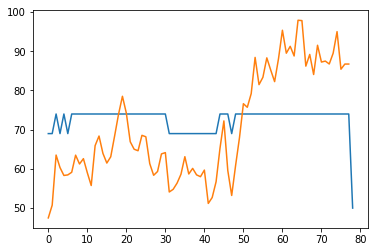

In [12]:
#The other option is to average the trajectory setps
traj_points_per_note = 8
new_traj = []
index = 0
while (index < len(traj)):
    new_traj.append(np.mean(traj[index:index + traj_points_per_note]))
    index += traj_points_per_note
new_traj.append(np.mean(traj[index:]))
new_traj = np.array(new_traj)

predicted_notes = generate_music_with_bias(new_traj)
plt.plot(predicted_notes)
plt.plot(new_traj)

In [13]:
midi_functions.create_midi_from_notes(predicted_notes,'softmax-mean-399-traj0001.mid', on=250)

In [112]:
len(predicted_notes)

77

In [111]:
len(new_traj)

77

In [28]:
import glob
top = 100
bot = 45
def get_trajs():
    traj_files = glob.glob("./data/data/g*")
    trajs = []
    for index, file in enumerate(traj_files):
        traj = np.loadtxt(file)
        trajs.append(traj)
        #print(traj.shape)
    return trajs
trajs = get_trajs()
notes = []
for traj in trajs:
    notes.append(generate_music_with_bias(traj))

In [29]:
norm = 0
for traj, note in zip(trajs,notes):
       norm += np.linalg.norm(traj - note)
        
norm = norm / len(notes)
norm

58.82518997805668

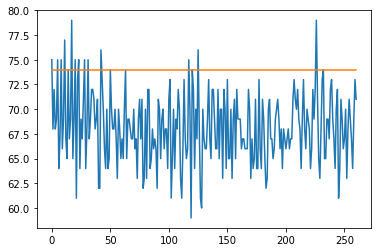

In [27]:
plt.plot(trajs[3])
plt.plot(notes[3])